# acquire

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import prepare
import acquire
import model

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

seed = 42

In [2]:
#df1 = pd.read_csv('winequality-red.csv')

In [3]:
#df2 = pd.read_csv('winequality-white.csv')

# prepare

In [4]:
#df1.head()

In [5]:
#df1['quality'].unique()

In [6]:
#df2['quality'].unique()

In [7]:
#df1['wine_type'] = 'red'

In [8]:
#df2['wine_type'] = 'white'

In [9]:
#wine = pd.concat([df1, df2])

In [10]:
#wine.to_csv('wine_quality.csv')

In [11]:
#wine.head()

- There are no null values in either csv.

- quality is the target variable here, and it is a range from 3-9

- removal of outliers got rid of about 600 rows



In [12]:
#wine = wine.rename(columns= {'fixed acidity': 'fixed_acidity',
#             'volatile acidity': 'volatile_acidity',
#             'citric acid': 'citric_acid',
#            'residual sugar': 'residual_sugar',
#             'free sulfur dioxide': 'free_sulfur_dioxide',
#             'total sulfur dioxide': 'total_sulfur_dioxide'})

In [13]:
def get_wine():
    
    df = pd.read_csv('wine_quality.csv')
    
    df = df.rename(columns= {'fixed acidity': 'fixed_acidity',
             'volatile acidity': 'volatile_acidity',
             'citric acid': 'citric_acid',
             'residual sugar': 'residual_sugar',
             'free sulfur dioxide': 'free_sulfur_dioxide',
             'total sulfur dioxide': 'total_sulfur_dioxide'})
    
    return df

In [14]:
df = acquire.get_wine()

In [15]:
def remove_outliers(df, k, col_list):
    ''' 
    This function takes in a dataframe, the threshold and a list of columns 
    and returns the dataframe with outliers removed
    '''   
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [16]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [17]:
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df = prepare.remove_outliers(df, 1.5, cols)

In [18]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4,6,red
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.9955,3.34,0.56,9.3,5,red
26,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.9962,3.28,0.59,9.5,5,red
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.9993,3.45,0.52,9.4,6,red
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,red


In [19]:
def inertial_dampening(df, cols, num=11):
    
    inertia = []
    seed = 42

    for n in range(1, num):
    
        kmeans = KMeans(n_clusters=n, random_state=seed)
    
        kmeans.fit(df[cols])
    
        inertia.append(kmeans.inertia_)
        
    results_df = pd.DataFrame({'n_clusters': list(range(1,num)),
              'inertia': inertia})

    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line', marker='x')

    plt.xticks(range(1, num))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Change in inertia as number of clusters increase')
    plt.show()

# explore

- fixed vs volatile acidity

- risidual suger vs wine quality (target)

- ph vs alcohol lvl

- how many wines do we have of each quality

- sulphates and quality

- sulfur dioxide vs sulphates

- wine type quality

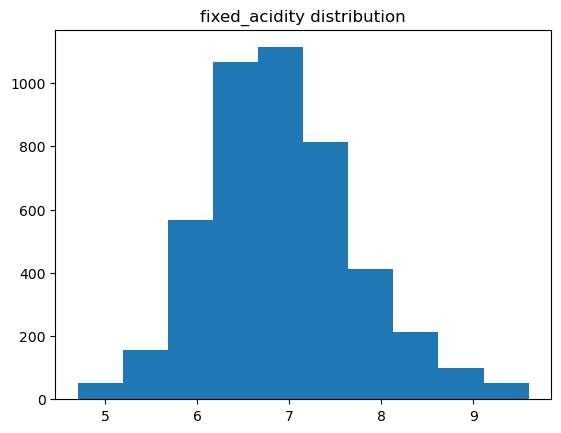

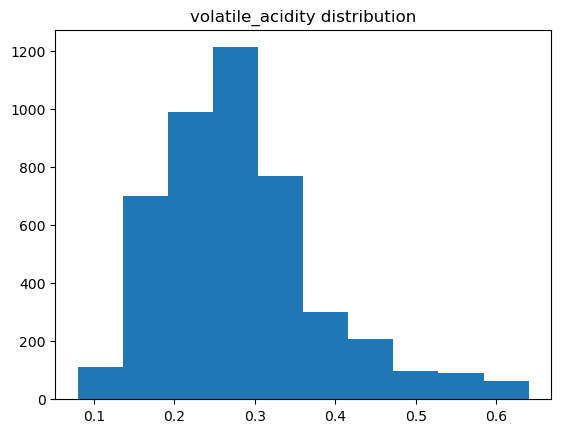

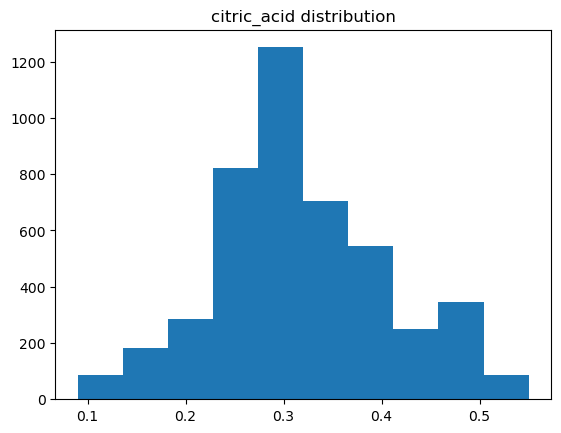

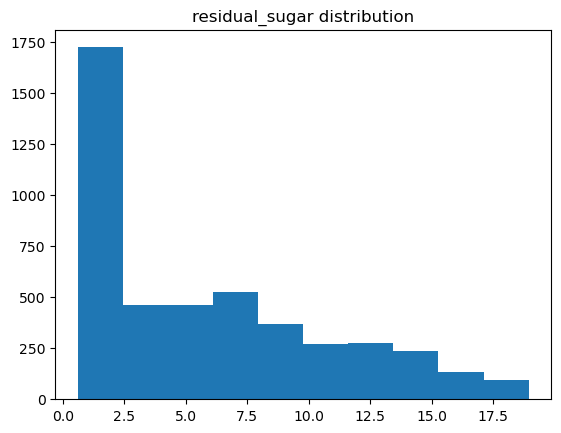

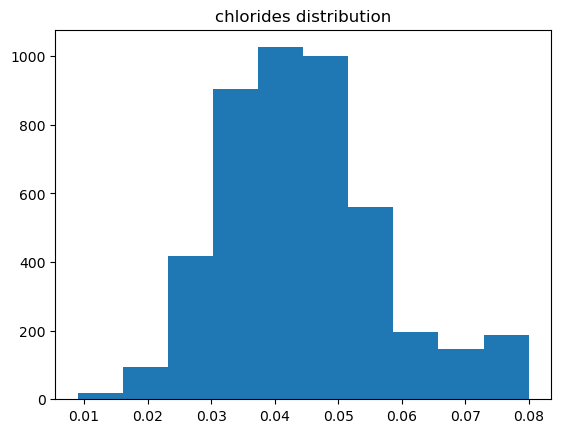

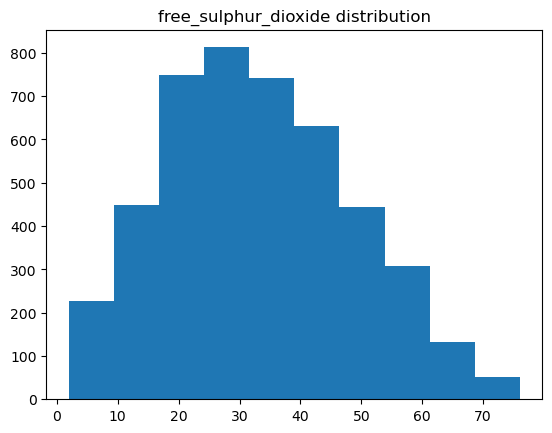

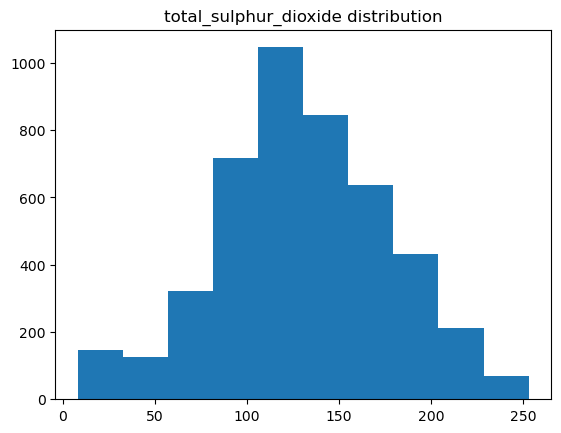

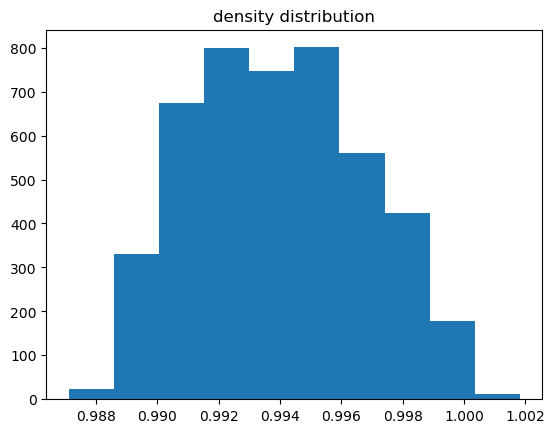

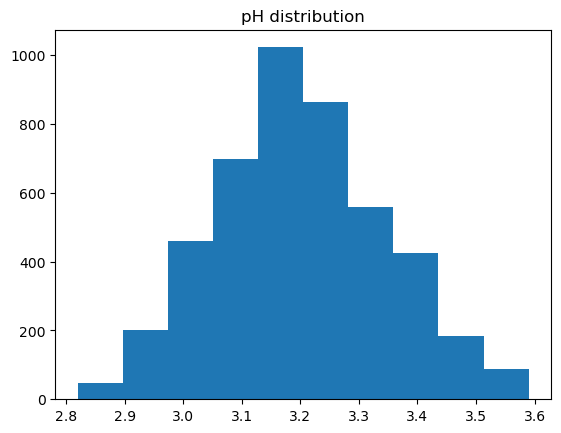

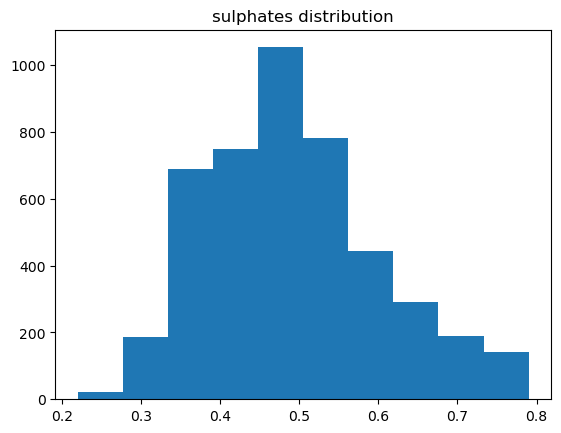

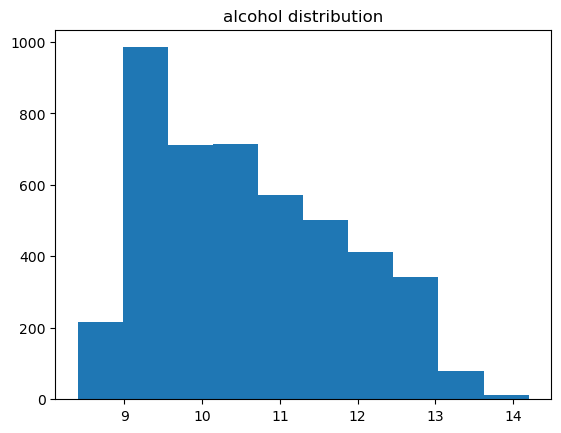

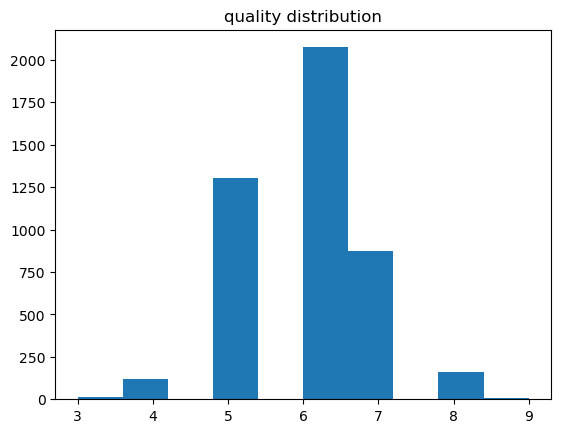

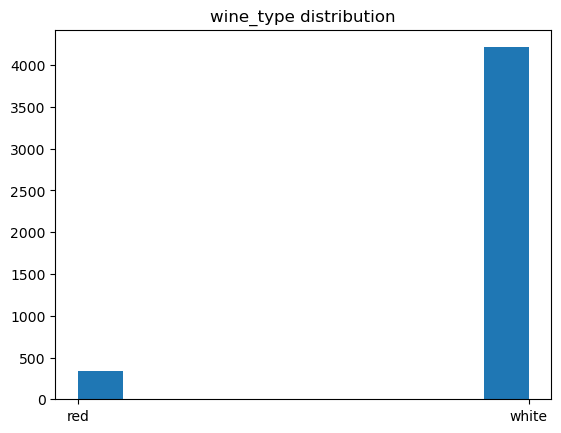

In [20]:
for col in df.columns:
    
    plt.hist(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()

In [21]:
train, validate, test = prepare.subset_df(df)

(2730, 13) (910, 13) (910, 13)


In [22]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
2704,5.5,0.320,0.45,4.9,0.028,25.0,191.0,0.99220,3.51,0.49,11.5,7,white
2210,7.4,0.240,0.40,4.3,0.032,9.0,95.0,0.99200,3.09,0.39,11.1,6,white
4263,6.2,0.210,0.34,6.6,0.030,36.0,91.0,0.99140,3.32,0.45,12.5,7,white
1911,7.8,0.250,0.41,3.7,0.042,37.0,149.0,0.99540,3.36,0.45,10.0,6,white
5678,5.4,0.265,0.28,7.8,0.052,27.0,91.0,0.99432,3.19,0.38,10.4,6,white


## fixed acidity vs volatile acidity

$H_0$ : There is no relationship

$H_a$ : There *is* some kind of relationship

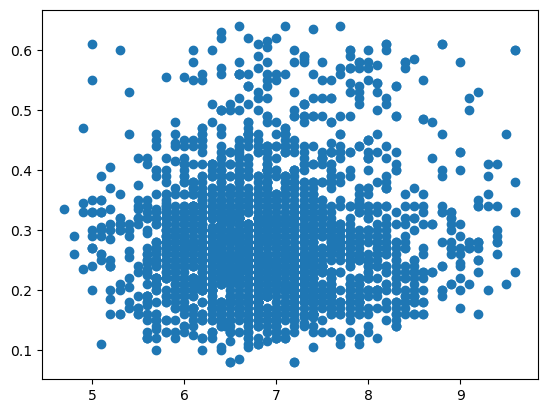

In [23]:
plt.scatter(data=train, x='fixed_acidity', y='volatile_acidity')
plt.show()

In [24]:
def spearmanr_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform a spearman r test on them and print out the t-statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    t, p = stats.spearmanr(group1, group2)

    alpha = .05
    seed = 42

    print(f'T-statistic = {t:.4f}') 
    print(f'p-value     = {p:.4f}')

    print('Is p-value < alpha?', p < alpha)

In [25]:
def pearsonr_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform an independent t-test on them and print out the t-statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    t, p = stats.pearsonr(group1, group2)

    alpha = .05
    seed = 42

    print(f'T-statistic = {t:.4f}') 
    print(f'p-value     = {p:.4f}')

    print('Is p-value < alpha?', p < alpha)

In [26]:
alpha = .05

corr, p = pearsonr(x=train['fixed_acidity'], y=train['volatile_acidity'])

In [27]:
pearsonr_report(train['fixed_acidity'], train['volatile_acidity'])

T-statistic = 0.0749
p-value     = 0.0001
Is p-value < alpha? True


In [28]:
p < alpha

True

Fixed and Volatile acidities *are* correlation to eachother

## free sulphur dioxide vs total sulphur dioxide

$H_0$: There is no relationship

$H_a$: There *is* a relationship

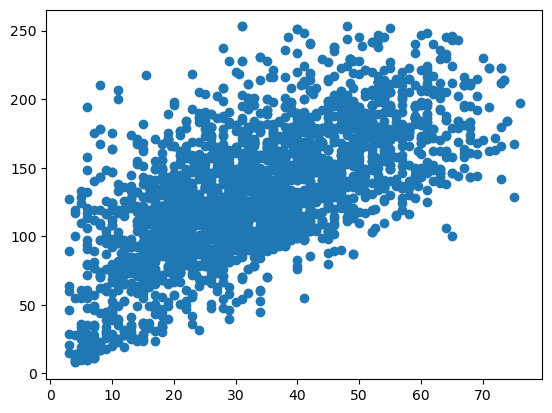

In [29]:
plt.scatter(data=train, x='free_sulphur_dioxide', y='total_sulphur_dioxide')
plt.show()

In [30]:
alpha = .05

corr, p = pearsonr(x=train['free_sulphur_dioxide'], y=train['total_sulphur_dioxide'])

In [31]:
corr, p

(0.6562231333375224, 0.0)

In [32]:
p < alpha

True

As with the acidity, there is a clear correlation here between total and free sulphur dioxide.

### sulphates vs free and total sulphur dioxides

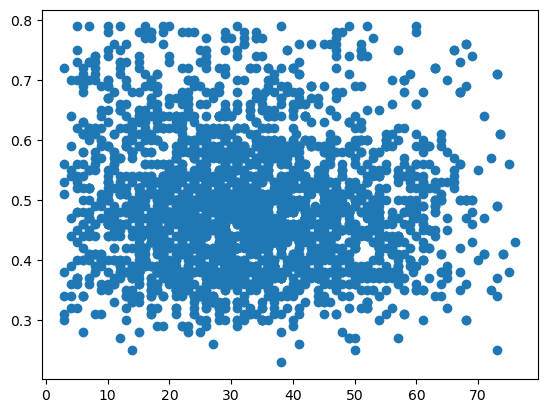

In [33]:
plt.scatter(data=train, x='free_sulphur_dioxide', y='sulphates')
plt.show()

In [34]:
pearsonr_report(train['sulphates'], train['free_sulphur_dioxide'])

T-statistic = -0.0516
p-value     = 0.0070
Is p-value < alpha? True


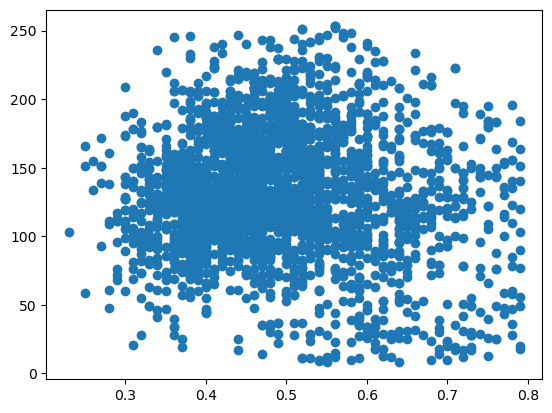

In [35]:
plt.scatter(data=train, x='sulphates', y='total_sulphur_dioxide')
plt.show()

In [36]:
pearsonr_report(train['sulphates'], train['total_sulphur_dioxide'])

T-statistic = -0.0587
p-value     = 0.0021
Is p-value < alpha? True


There seems to be a negative correlation between sulphates **and** free sulphur dioxde and between sulphates and total sulphur dioxide

## sugars vs wine quality

$H_0$: There is no significant relationship between residual sugar level and wine quality

$H_a$: There *is* a significant relationship between residual sugars and wine quality

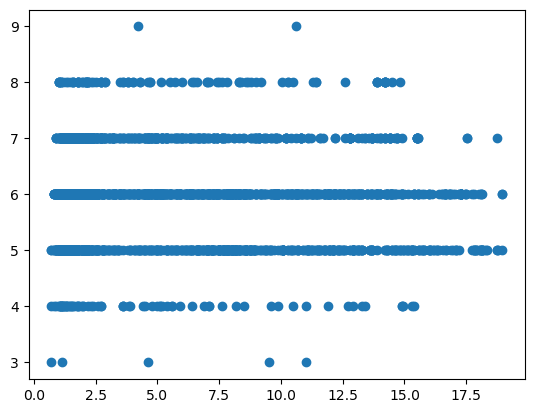

In [37]:
plt.scatter(data=train, x='residual_sugar', y='quality')
plt.show()

In [38]:
def ind_ttest_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform an independent t-test on them and print out the t-statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    t, p = stats.ttest_ind(group1, group2, equal_var=False)

    alpha = .05
    seed = 42

    print(f'T-statistic = {t:.4f}') 
    print(f'p-value     = {p:.4f}')

    print('Is p-value < alpha?', p < alpha)

In [39]:
ind_ttest_report(train['residual_sugar'], train['quality'])

T-statistic = 0.2095
p-value     = 0.8341
Is p-value < alpha? False


In [40]:
def mannwhitney_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform an independent t-test on them and print out the t-statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    t, p = stats.mannwhitneyu(group1, group2)

    alpha = .05
    seed = 42

    print(f'T-statistic = {t:.4f}') 
    print(f'p-value     = {p:.4f}')

    print('Is p-value < alpha?', p < alpha)

In [41]:
mannwhitney_report(train['residual_sugar'], train['quality'])

T-statistic = 3183626.0000
p-value     = 0.0000
Is p-value < alpha? True


Judging by my nonparametric correlation statistical test (mannwhitneyu) there is a very significant relationship here

In [42]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
2704,5.5,0.320,0.45,4.9,0.028,25.0,191.0,0.99220,3.51,0.49,11.5,7,white
2210,7.4,0.240,0.40,4.3,0.032,9.0,95.0,0.99200,3.09,0.39,11.1,6,white
4263,6.2,0.210,0.34,6.6,0.030,36.0,91.0,0.99140,3.32,0.45,12.5,7,white
1911,7.8,0.250,0.41,3.7,0.042,37.0,149.0,0.99540,3.36,0.45,10.0,6,white
5678,5.4,0.265,0.28,7.8,0.052,27.0,91.0,0.99432,3.19,0.38,10.4,6,white


## citric acid vs ph lvls

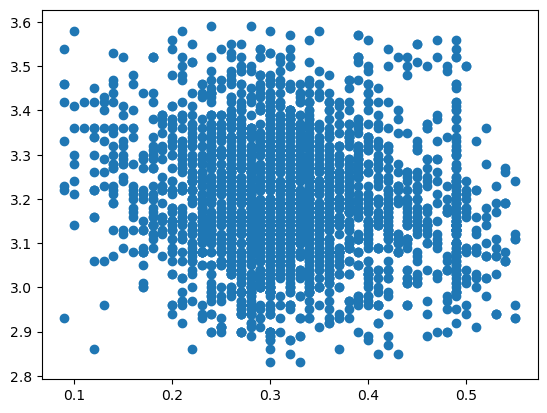

In [43]:
plt.scatter(data=train, x='citric_acid', y='pH')
plt.show()

In [44]:
pearsonr_report(train['citric_acid'], train['pH'])

T-statistic = -0.1310
p-value     = 0.0000
Is p-value < alpha? True


There seems to be a negative correlation between citric acid levels and pH

## density vs quality

$H_0$: There is no relationship between density and quality.

$H_a$: There *is* a relationship betwen density and quality.

In [45]:
ind_ttest_report(train['quality'], train['density'])

T-statistic = 298.2625
p-value     = 0.0000
Is p-value < alpha? True


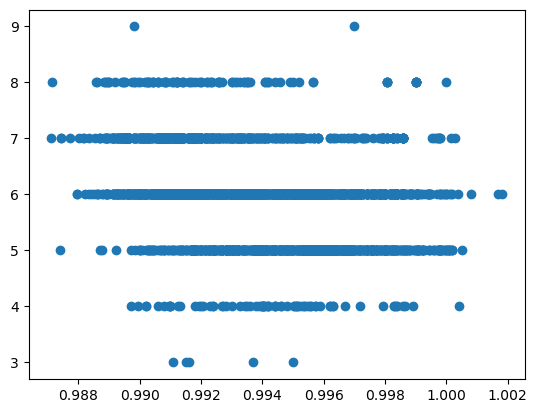

In [46]:
plt.scatter(data=train, x='density', y='quality')

plt.show()

There **is** a relationship between density and wine quality

<div class="alert alert-block alert-info">
<b>Takeaways:</b> 
    
- Fixed acidity and volatile acidity have a relationship with each other
    
- Free sulphur dioxide and total sulphur dioxide have a relatioship with eachother, while both of those features are also negatively correlated to the sulphates feature
    
- residual sugar levels are strongly related to wine quality
    
- citric acid and pH levels have a medium-low negative correlation with each other
    
- Density does not have a relationship with wine quality

# modeling (clustering)

In [47]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
2704,5.5,0.320,0.45,4.9,0.028,25.0,191.0,0.99220,3.51,0.49,11.5,7,white
2210,7.4,0.240,0.40,4.3,0.032,9.0,95.0,0.99200,3.09,0.39,11.1,6,white
4263,6.2,0.210,0.34,6.6,0.030,36.0,91.0,0.99140,3.32,0.45,12.5,7,white
1911,7.8,0.250,0.41,3.7,0.042,37.0,149.0,0.99540,3.36,0.45,10.0,6,white
5678,5.4,0.265,0.28,7.8,0.052,27.0,91.0,0.99432,3.19,0.38,10.4,6,white


In [48]:
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulphur_dioxide',
        'total_sulphur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test, MinMaxScaler(), cols)


In [49]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
2704,0.163265,0.428571,0.782609,0.230137,0.267606,0.301370,0.746939,0.346023,0.894737,0.464286,0.553571,7,white
2210,0.551020,0.285714,0.673913,0.197260,0.323944,0.082192,0.355102,0.332427,0.342105,0.285714,0.482143,6,white
4263,0.306122,0.232143,0.543478,0.323288,0.295775,0.452055,0.338776,0.291638,0.644737,0.392857,0.732143,7,white
1911,0.632653,0.303571,0.695652,0.164384,0.464789,0.465753,0.575510,0.563562,0.697368,0.392857,0.285714,6,white
5678,0.142857,0.330357,0.413043,0.389041,0.605634,0.328767,0.338776,0.490143,0.473684,0.267857,0.357143,6,white


## Cluster #1 : fixed and volatile acidities

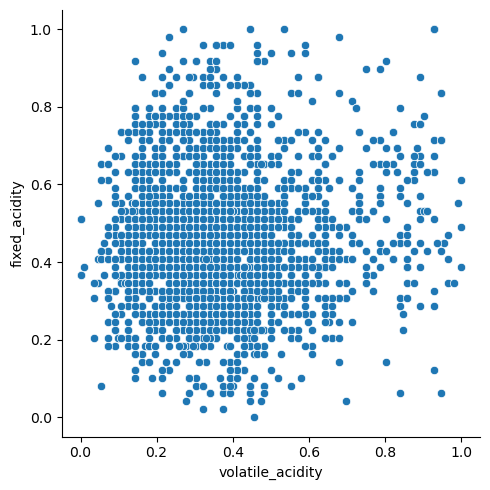

In [50]:
sns.relplot(data=train_scaled, x='volatile_acidity', y='fixed_acidity')

In [51]:
cols = ['volatile_acidity', 'fixed_acidity']

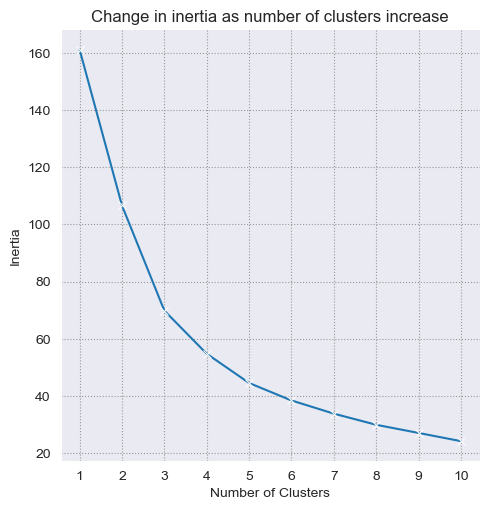

In [52]:
inertial_dampening(train_scaled, cols)

Using the elbow method here, I would say 3 clusters has the best performance, with maybe 4 as second best.

In [53]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model.xy_subsets(train_scaled, validate_scaled, test_scaled, 'quality')

In [54]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type
2704,0.163265,0.428571,0.782609,0.230137,0.267606,0.301370,0.746939,0.346023,0.894737,0.464286,0.553571,white
2210,0.551020,0.285714,0.673913,0.197260,0.323944,0.082192,0.355102,0.332427,0.342105,0.285714,0.482143,white
4263,0.306122,0.232143,0.543478,0.323288,0.295775,0.452055,0.338776,0.291638,0.644737,0.392857,0.732143,white
1911,0.632653,0.303571,0.695652,0.164384,0.464789,0.465753,0.575510,0.563562,0.697368,0.392857,0.285714,white
5678,0.142857,0.330357,0.413043,0.389041,0.605634,0.328767,0.338776,0.490143,0.473684,0.267857,0.357143,white


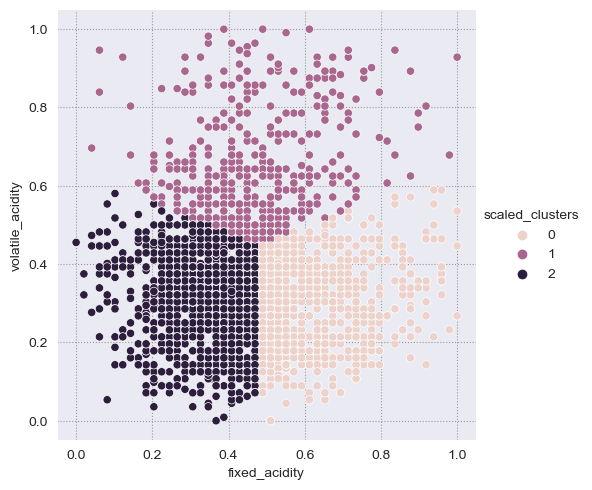

In [55]:
kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans.fit(X_train[['fixed_acidity', 'volatile_acidity']])
X_train['scaled_clusters'] = kmeans.predict(X_train[['fixed_acidity', 'volatile_acidity']])

sns.relplot(data=X_train, x='fixed_acidity', y='volatile_acidity', hue='scaled_clusters')
plt.show()

In [56]:
X_train = X_train.rename(columns= {'scaled_clusters': 'acidity_areas'})

X_train = X_train.drop(columns=['fixed_acidity', 'volatile_acidity'])

In [57]:
X_train.head()

,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type,acidity_areas
2704,0.782609,0.230137,0.267606,0.301370,0.746939,0.346023,0.894737,0.464286,0.553571,white,2
2210,0.673913,0.197260,0.323944,0.082192,0.355102,0.332427,0.342105,0.285714,0.482143,white,0
4263,0.543478,0.323288,0.295775,0.452055,0.338776,0.291638,0.644737,0.392857,0.732143,white,2
1911,0.695652,0.164384,0.464789,0.465753,0.575510,0.563562,0.697368,0.392857,0.285714,white,0
5678,0.413043,0.389041,0.605634,0.328767,0.338776,0.490143,0.473684,0.267857,0.357143,white,2


In [58]:
X_validate['scaled_clusters'] = kmeans.predict(X_validate[['fixed_acidity', 'volatile_acidity']])

In [59]:
X_validate = X_validate.rename(columns= {'scaled_clusters': 'acidity_areas'})

In [60]:
X_validate = X_validate.drop(columns=['fixed_acidity', 'volatile_acidity'])

In [61]:
X_validate.head()

,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type,acidity_areas
6002,0.804348,0.301370,0.802817,0.520548,0.730612,0.442556,0.473684,0.339286,0.238095,white,2
3299,0.456522,0.060274,0.478873,0.301370,0.461224,0.495581,0.802632,0.678571,0.321429,white,2
5845,0.369565,0.082192,0.197183,0.246575,0.355102,0.148878,0.315789,0.553571,0.696429,white,2
5128,0.391304,0.131507,0.352113,0.342466,0.514286,0.176071,0.565789,0.267857,0.839286,white,1
6287,0.500000,0.646575,0.366197,0.205479,0.604082,0.649218,0.065789,0.232143,0.107143,white,2


In [62]:
X_test['scaled_clusters'] = kmeans.predict(X_test[['fixed_acidity', 'volatile_acidity']])

In [63]:
X_test = X_test.rename(columns= {'scaled_clusters': 'acidity_areas'})

In [64]:
X_test = X_test.drop(columns=['fixed_acidity', 'volatile_acidity'])

In [65]:
X_test.head(1)

,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type,acidity_areas
3398,0.26087,0.350685,0.43662,0.438356,0.628571,0.577158,0.736842,0.625,0.267857,white,2


## Cluster #2 : free and total sulphur dioxides

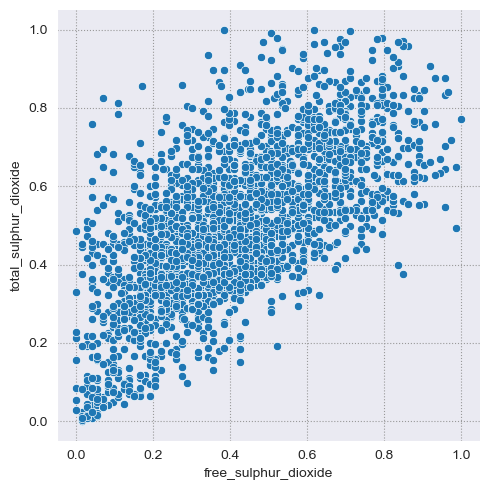

In [66]:
sns.relplot(data=train_scaled, x='free_sulphur_dioxide', y='total_sulphur_dioxide')

plt.show()

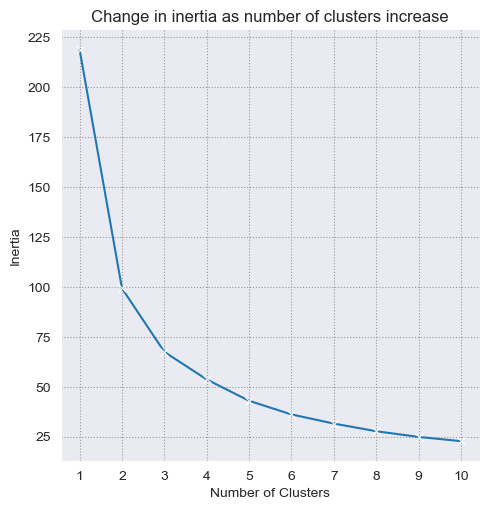

In [67]:
cols = ['free_sulphur_dioxide', 'total_sulphur_dioxide']

model.inertial_dampening(X_train, cols)

Using the elbow method here, 3 clusters seems to be the best fit here as well

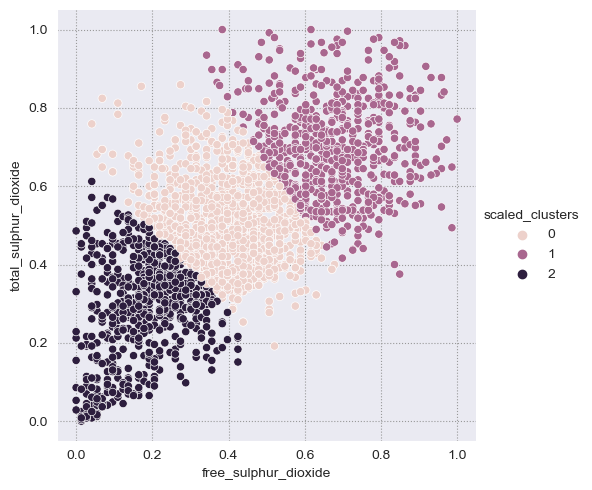

In [68]:
kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans.fit(X_train[['free_sulphur_dioxide', 'total_sulphur_dioxide']])
X_train['scaled_clusters'] = kmeans.predict(X_train[['free_sulphur_dioxide', 'total_sulphur_dioxide']])

sns.relplot(data=X_train, x='free_sulphur_dioxide', y='total_sulphur_dioxide', hue='scaled_clusters')
plt.show()

In [69]:
X_train = X_train.rename(columns= {'scaled_clusters': 'sulphur_dioxide_clusters'})

In [70]:
X_train = X_train.drop(columns=['free_sulphur_dioxide', 'total_sulphur_dioxide'])

In [71]:
X_train.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,acidity_areas,sulphur_dioxide_clusters
2704,0.782609,0.230137,0.267606,0.346023,0.894737,0.464286,0.553571,white,2,0
2210,0.673913,0.197260,0.323944,0.332427,0.342105,0.285714,0.482143,white,0,2
4263,0.543478,0.323288,0.295775,0.291638,0.644737,0.392857,0.732143,white,2,0
1911,0.695652,0.164384,0.464789,0.563562,0.697368,0.392857,0.285714,white,0,0
5678,0.413043,0.389041,0.605634,0.490143,0.473684,0.267857,0.357143,white,2,2


In [72]:
X_validate['scaled_clusters'] = kmeans.predict(X_validate[['free_sulphur_dioxide', 'total_sulphur_dioxide']])

X_validate = X_validate.rename(columns= {'scaled_clusters': 'sulphur_dioxide_clusters'})
X_validate = X_validate.drop(columns=['free_sulphur_dioxide', 'total_sulphur_dioxide'])

In [73]:
X_validate.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,acidity_areas,sulphur_dioxide_clusters
6002,0.804348,0.301370,0.802817,0.442556,0.473684,0.339286,0.238095,white,2,1
3299,0.456522,0.060274,0.478873,0.495581,0.802632,0.678571,0.321429,white,2,0
5845,0.369565,0.082192,0.197183,0.148878,0.315789,0.553571,0.696429,white,2,2
5128,0.391304,0.131507,0.352113,0.176071,0.565789,0.267857,0.839286,white,1,0
6287,0.500000,0.646575,0.366197,0.649218,0.065789,0.232143,0.107143,white,2,0


In [74]:
X_test['scaled_clusters'] = kmeans.predict(X_test[['free_sulphur_dioxide', 'total_sulphur_dioxide']])

X_test = X_test.rename(columns= {'scaled_clusters': 'sulphur_dioxide_clusters'})
X_test = X_test.drop(columns=['free_sulphur_dioxide', 'total_sulphur_dioxide'])

In [75]:
X_test.head(1)

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,acidity_areas,sulphur_dioxide_clusters
3398,0.26087,0.350685,0.43662,0.577158,0.736842,0.625,0.267857,white,2,0


In [76]:
def fit_clusters(df, col1, col2, new_column, n=3):
    
    seed = 42
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    kmeans.fit(X_train[[col1, col2]])
    
    df['scaled_clusters'] = kmeans.predict(df[[col1, col2]])

    sns.relplot(data=df, x=col1, y=col2, hue='scaled_clusters')
    plt.show()
    
    df = df.rename(columns= {'scaled_clusters': new_column})
    df = df.drop(columns=[col1, col2])
    
    return df

In [77]:
def predict_clusters(df, col1, col2, new_column):
    
    df['scaled_clusters'] = kmeans.predict(df[[col1, col2]])

    df = df.rename(columns= {'scaled_clusters': new_column})
    df = df.drop(columns=[col1, col2])
    
    return df

In [78]:
X_train = pd.get_dummies(X_train, columns=['acidity_areas', 'sulphur_dioxide_clusters', 'wine_type'], drop_first=True)

In [79]:
X_validate = pd.get_dummies(X_validate, columns=['acidity_areas', 'sulphur_dioxide_clusters', 'wine_type'], drop_first=True)

In [80]:
X_test = pd.get_dummies(X_test, columns=['acidity_areas', 'sulphur_dioxide_clusters', 'wine_type'], drop_first=True)

In [81]:
X_train.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,acidity_areas_1,acidity_areas_2,sulphur_dioxide_clusters_1,sulphur_dioxide_clusters_2,wine_type_white
2704,0.782609,0.230137,0.267606,0.346023,0.894737,0.464286,0.553571,0,1,0,0,1
2210,0.673913,0.197260,0.323944,0.332427,0.342105,0.285714,0.482143,0,0,0,1,1
4263,0.543478,0.323288,0.295775,0.291638,0.644737,0.392857,0.732143,0,1,0,0,1
1911,0.695652,0.164384,0.464789,0.563562,0.697368,0.392857,0.285714,0,0,0,0,1
5678,0.413043,0.389041,0.605634,0.490143,0.473684,0.267857,0.357143,0,1,0,1,1


In [82]:
X_validate.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,acidity_areas_1,acidity_areas_2,sulphur_dioxide_clusters_1,sulphur_dioxide_clusters_2,wine_type_white
6002,0.804348,0.301370,0.802817,0.442556,0.473684,0.339286,0.238095,0,1,1,0,1
3299,0.456522,0.060274,0.478873,0.495581,0.802632,0.678571,0.321429,0,1,0,0,1
5845,0.369565,0.082192,0.197183,0.148878,0.315789,0.553571,0.696429,0,1,0,1,1
5128,0.391304,0.131507,0.352113,0.176071,0.565789,0.267857,0.839286,1,0,0,0,1
6287,0.500000,0.646575,0.366197,0.649218,0.065789,0.232143,0.107143,0,1,0,0,1


In [83]:
X_test.head(1)

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,acidity_areas_1,acidity_areas_2,sulphur_dioxide_clusters_1,sulphur_dioxide_clusters_2,wine_type_white
3398,0.26087,0.350685,0.43662,0.577158,0.736842,0.625,0.267857,0,1,0,0,1


# modeling (classification, no clusters)

In [94]:
def make_baseline(df, baseline, col):
    '''
    This function is used to create a column within the dataframe to make a baseline column, and then calculate the baseline accuracy. Needs to be optimized more, but functions as is currently. Make sure to use the word 'baseline' when calling function.
    '''
    
    seed = 42
    
    df[baseline] = df[col].value_counts().idxmax()    

    base = (df[col] == df[baseline]).mean()
    
    print(f'Baseline Accuracy is: {base:.3}')

In [95]:
make_baseline(train, 'baseline', 'quality')

Baseline Accuracy is: 0.458


In [96]:
X_train.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,acidity_areas_1,acidity_areas_2,sulphur_dioxide_clusters_1,sulphur_dioxide_clusters_2,wine_type_white
2704,0.782609,0.230137,0.267606,0.346023,0.894737,0.464286,0.553571,0,1,0,0,1
2210,0.673913,0.197260,0.323944,0.332427,0.342105,0.285714,0.482143,0,0,0,1,1
4263,0.543478,0.323288,0.295775,0.291638,0.644737,0.392857,0.732143,0,1,0,0,1
1911,0.695652,0.164384,0.464789,0.563562,0.697368,0.392857,0.285714,0,0,0,0,1
5678,0.413043,0.389041,0.605634,0.490143,0.473684,0.267857,0.357143,0,1,0,1,1


In [97]:
def xy_subsets(train, validate, test, target):
    '''
    This function will separate each of my subsets for the dataset (train, validate, and test) and split them further into my x and y subsets for modeling. When running this, be sure to assign each of the six variables in the proper order, otherwise it will almost certainly mess up. (X_train, y_train, X_validate, y_validate, X_test, y_test).
    '''  
    seed = 42
    
    X_train = train.drop(columns=[target])
    y_train = train[target]

    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [98]:
def subset_df(df, stratify=None, seed=42):
    '''
    This function takes in a DataFrame and splits it into train, validate, test subsets for our modeling phase. Does not take in a stratify option.
    '''
    train, val_test = train_test_split(df, train_size=.6, random_state=seed)
    validate, test = train_test_split(val_test, train_size=.5, random_state=seed)
        
    return train, validate, test

In [99]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4,6,red
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.9955,3.34,0.56,9.3,5,red
26,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.9962,3.28,0.59,9.5,5,red
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.9993,3.45,0.52,9.4,6,red
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,red


In [100]:
def rf_gen(df, col):
    
    metrics = []
    
    seed = 42

    for i in range(1, 20):
        '''
        This function will create a dataframe of Random Forest models of varying max_depths and compare the differences from the train and validate sets and return the dataframe. It requires the variable names to be: X_train, y_train, X_validate, and y_validate.
        '''
        train, validate, test = subset_df(df, stratify=col)
        X_train, y_train, X_validate, y_validate, X_test, y_test = xy_subsets(train, validate, test, col)
        
        X_train = pd.get_dummies(X_train, columns=['wine_type'], drop_first=True)
        X_validate = pd.get_dummies(X_validate, columns=['wine_type'], drop_first=True)
        X_test = pd.get_dummies(X_test, columns=['wine_type'], drop_first=True)
        
        rf = RandomForestClassifier(max_depth=i, min_samples_leaf=3, n_estimators=200, random_state=42)
        rf = rf.fit(X_train, y_train)
        
        in_sample_accuracy = rf.score(X_train, y_train)
        out_of_sample_accuracy = rf.score(X_validate, y_validate)
        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
            }
    
        metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df["difference"] = df.train_accuracy - df.validate_accuracy
    
    return df

In [101]:
rf_gen(df, 'quality')

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.457875,0.441758,0.016117
1,2,0.501465,0.483516,0.017949
2,3,0.539560,0.525275,0.014286
3,4,0.568132,0.541758,0.026374
4,5,0.599634,0.562637,0.036996
5,6,0.648718,0.587912,0.060806
6,7,0.690842,0.594505,0.096337
7,8,0.724176,0.612088,0.112088
8,9,0.774725,0.620879,0.153846
9,10,0.820147,0.629670,0.190476


In [102]:
def dectree_gen(df, col):
    
    metrics = []
    
    seed = 42

    for i in range(1, 20):
        '''
        This function will create a dataframe of Decision Tree models of varying max_depths and compare the differences from the train and validate sets and return the dataframe. It requires the variable names to be: X_train, y_train, X_validate, and y_validate.
        '''
        train, validate, test = subset_df(df, stratify=col)   
        X_train, y_train, X_validate, y_validate, X_test, y_test = xy_subsets(train, validate, test, col)
        
        X_train = pd.get_dummies(X_train, columns=['wine_type'], drop_first=True)
        X_validate = pd.get_dummies(X_validate, columns=['wine_type'], drop_first=True)
        X_test = pd.get_dummies(X_test, columns=['wine_type'], drop_first=True)
        
        dectree = DecisionTreeClassifier(max_depth=i, random_state=42)
        dectree = dectree.fit(X_train, y_train)

        in_sample_accuracy = dectree.score(X_train, y_train)
        out_of_sample_accuracy = dectree.score(X_validate, y_validate)
        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
            }
    
        metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df["difference"] = df.train_accuracy - df.validate_accuracy
    
    return df

In [ ]:
dectree_gen(df, 'quality')

In [ ]:
def knn_gen(df, col):
    
    metrics = []

    seed = 42
    
    for i in range(1, 21):
        '''
        This function will create a dataframe of KNN models of varying n_neighbors and compare the differences from the train and validate sets and return the dataframe. It requires the variable names to be: X_train, y_train, X_validate, and y_validate.
        '''
        train, validate, test = subset_df(df, stratify=col)   
        X_train, y_train, X_validate, y_validate, X_test, y_test = xy_subsets(train, validate, test, col)
        
        X_train = pd.get_dummies(X_train, columns=['wine_type'], drop_first=True)
        X_validate = pd.get_dummies(X_validate, columns=['wine_type'], drop_first=True)
        X_test = pd.get_dummies(X_test, columns=['wine_type'], drop_first=True)
        
        knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
        knn = knn.fit(X_train, y_train)

        in_sample_accuracy = knn.score(X_train, y_train)
        out_of_sample_accuracy = knn.score(X_validate, y_validate)
        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
            }
    
        metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df["difference"] = df.train_accuracy - df.validate_accuracy
    
    return df

In [93]:
knn_gen(df, 'quality')

NameError: name 'knn_gen' is not defined

A decision tree with a max depth of 4 ended up being the best model without any clustering, so the goal is to beat that. 
- Train acc: 0.571708	
- Val acc: 0.551551	
- Difference: 0.020157

# modeling (classification with clusters)

In [92]:
X_train.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,acidity_areas_1,acidity_areas_2,sulphur_dioxide_clusters_1,sulphur_dioxide_clusters_2,wine_type_white
2704,0.782609,0.230137,0.267606,0.346023,0.894737,0.464286,0.553571,0,1,0,0,1
2210,0.673913,0.197260,0.323944,0.332427,0.342105,0.285714,0.482143,0,0,0,1,1
4263,0.543478,0.323288,0.295775,0.291638,0.644737,0.392857,0.732143,0,1,0,0,1
1911,0.695652,0.164384,0.464789,0.563562,0.697368,0.392857,0.285714,0,0,0,0,1
5678,0.413043,0.389041,0.605634,0.490143,0.473684,0.267857,0.357143,0,1,0,1,1


In [ ]:
X_validate.head()

In [ ]:
X_train = X_train.drop(columns='baseline')

In [ ]:
def rf_gen(X_train, y_train, X_validate, y_validate):
    
    metrics = []
    
    seed = 42

    for i in range(1, 20):
        '''
        This function will create a dataframe of Random Forest models of varying max_depths and 
        compare the differences from the train and validate sets and return the dataframe. 
        at requires the variable names to be: X_train, y_train, X_validate, and y_validate.
        '''
        rf = RandomForestClassifier(max_depth=i, min_samples_leaf=3, n_estimators=200, random_state=42)
        rf = rf.fit(X_train, y_train)
        
        in_sample_accuracy = rf.score(X_train, y_train)
        out_of_sample_accuracy = rf.score(X_validate, y_validate)
        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
            }
    
        metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df["difference"] = df.train_accuracy - df.validate_accuracy
    
    return df

In [ ]:
rf_gen(X_train, y_train, X_validate, y_validate)

In [ ]:
def dectree_gen(X_train, y_train, X_validate, y_validate):
    
    metrics = []
    
    seed = 42

    for i in range(1, 20):
        '''
        This function will create a dataframe of Decision Tree models of varying max_depths and 
        compare the differences from the train and validate sets and return the dataframe. 
        It requires the variable names to be: X_train, y_train, X_validate, and y_validate.
        '''
        dectree = DecisionTreeClassifier(max_depth=i, random_state=42)
        dectree = dectree.fit(X_train, y_train)

        in_sample_accuracy = dectree.score(X_train, y_train)
        out_of_sample_accuracy = dectree.score(X_validate, y_validate)
        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
            }
    
        metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df["difference"] = df.train_accuracy - df.validate_accuracy
    
    return df

In [ ]:
dectree_gen(X_train, y_train, X_validate, y_validate)

In [ ]:
def knn_gen(X_train, y_train, X_validate, y_validate):
    
    metrics = []

    seed = 42
    
    for i in range(1, 21):
        '''
        This function will create a dataframe of KNN models of varying n_neighbors and compare the differences from the train and validate sets and return the dataframe. It requires the variable names to be: X_train, y_train, X_validate, and y_validate.
        '''
        knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
        knn = knn.fit(X_train, y_train)

        in_sample_accuracy = knn.score(X_train, y_train)
        out_of_sample_accuracy = knn.score(X_validate, y_validate)
        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
            }
    
        metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df["difference"] = df.train_accuracy - df.validate_accuracy
    
    return df

In [ ]:
knn_gen(X_train, y_train, X_validate, y_validate)